In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt

from urllib.request import Request

url = Request('https://www.myfootballfacts.com/premier-league-winners/', headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(url)
html = webpage.read().decode("utf-8")
soup = BeautifulSoup(html, "html.parser")

In [2]:
# Print the actual HTML code of the page

# print (soup.prettify())

In [3]:
# Extract the title of the page

print (soup.title)
print (soup.title.text)

<title> Premier League Winners by Year | My Football Facts</title>
 Premier League Winners by Year | My Football Facts


In [4]:
# The data that we are interested in appears to be in some sort of
# table.  Look for all of the table elements on the page, and print
# out their attributes.

for element in soup.find_all('table'):
    print (element.attrs)

{'id': 'wptmTbl1319', 'data-id': '1319', 'data-responsive': 'false', 'data-hidecols': 'false', 'data-type': 'html', 'data-paging': 'false', 'data-searching': 'true', 'data-ordering': 'false', 'data-scroll-x': 'true', 'data-scroll-collapse': 'true', 'data-align': 'center', 'data-colwidths': '[69,40,127,64,72,75,67,63,64,50,57,50]', 'class': ['disablePager', 'filterable']}
{'id': 'wptmTbl2606', 'data-id': '2606', 'data-responsive': 'false', 'data-hidecols': 'false', 'data-type': 'html', 'data-paging': 'false', 'data-searching': 'false', 'data-ordering': 'false', 'data-scroll-x': 'true', 'data-scroll-collapse': 'true', 'data-align': 'center', 'data-colwidths': '[40,130,54]', 'class': ['disablePager']}
{'border': '0', 'cellspacing': '0', 'cellpadding': '0', 'role': 'presentation'}


In [5]:
# We see that there are some elements known as 'disablePager'
#
# Let's extract them from the page and store them in a new object

gdp_table = soup.find("table", attrs={"class": "disablePager"})

# print (gdp_table.prettify())

In [6]:
# We see that the data in the tables are contained within a <tr> tag

gdp_table_data = gdp_table.tbody.find_all("tr")  # contains 2 rows

# print (gdp_table_data)

In [7]:
Season = []
Winner = []
Played = []
Won = []
Drawn = []
Lost = []
Goals_F = []
Goals_A = []
GD = []
Points = []
PPG = []

data = soup.find_all('tbody')[0]

for tr in data.find_all('tr'):
    txt = tr.text.replace('\n', ' ').strip().split()
    if len(txt) == 12:
        txt[1] = '{} {}'.format(txt[1], txt[2])
        txt.remove(txt[2])
    Season.append(txt[0])
    Winner.append(txt[1])
    Played.append(txt[2])
    Won.append(txt[3])
    Drawn.append(txt[4])
    Lost.append(txt[5])
    Goals_F.append(txt[6])
    Goals_A.append(txt[7])
    GD.append(txt[8])
    Points.append(txt[9])
    PPG.append(txt[10])

    
df = pd.DataFrame({'Season':Season, 'Winner':Winner, 'Played':Played,'Won':Won,'Drawn':Drawn,'Lost':Lost,'Goals For':Goals_F,'Goals Attempted':Goals_A,'GD':GD,'Points':Points,'PPG':PPG})

df.head(1000)

,Season,Winner,Played,Won,Drawn,Lost,Goals For,Goals Attempted,GD,Points,PPG
0,1992-93,Manchester United,42,24,12,6,67,31,36,84,2.00
1,1993-94,Manchester United,42,27,11,4,80,38,42,92,2.19
2,1994-95,Blackburn Rovers,42,27,8,7,80,39,41,89,2.12
3,1995-96,Manchester United,38,25,7,6,73,35,38,82,2.16
4,1996-97,Manchester United,38,21,12,5,76,44,32,75,1.97
5,1997-98,Arsenal,38,23,9,6,68,33,35,78,2.05
6,1998-99,Manchester United,38,22,13,3,80,37,43,79,2.08
7,1999-00,Manchester United,38,28,7,3,97,45,52,91,2.39
8,2000-01,Manchester United,38,24,8,6,79,41,38,80,2.11
9,2001-02,Arsenal,38,26,9,3,79,36,43,87,2.29


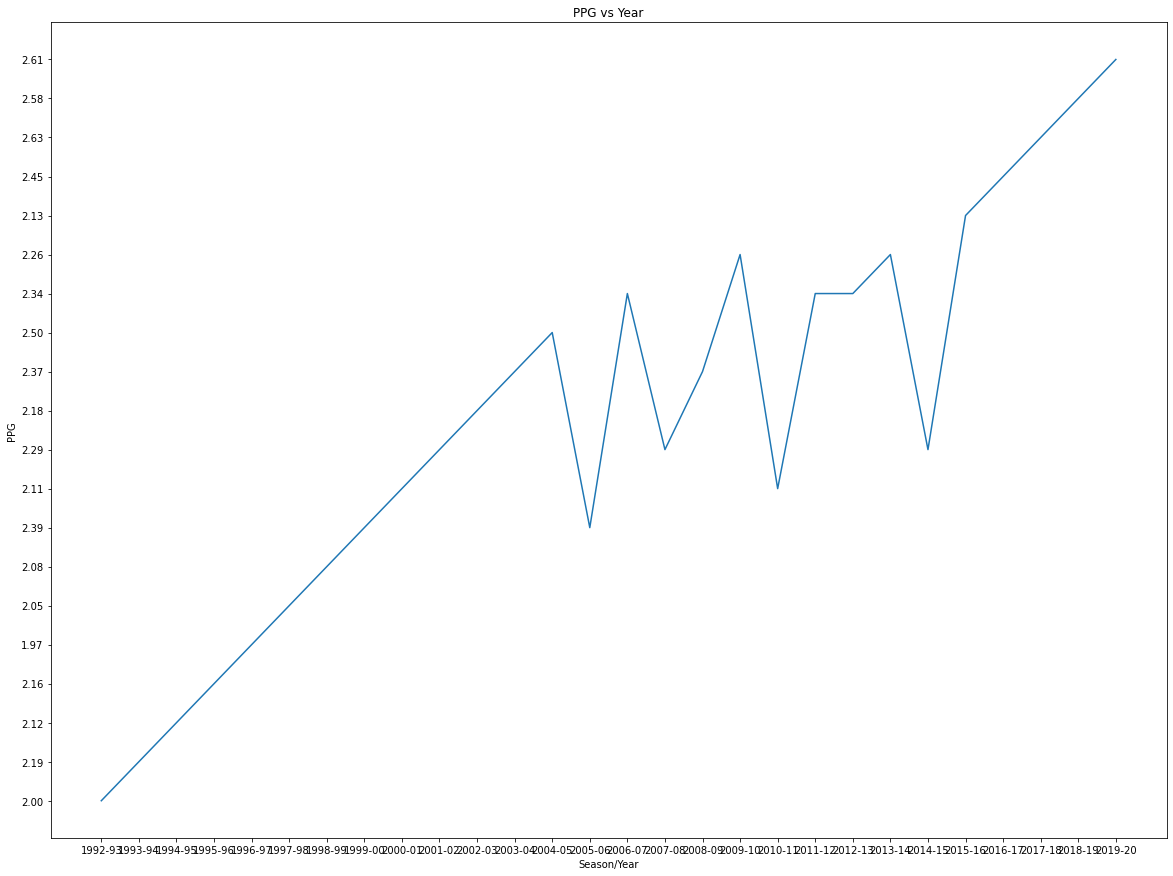

In [8]:
import numpy as np

x = Season
y = PPG
plt.figure(figsize=(20,15))
plt.xlabel('Season/Year')
plt.ylabel('PPG')
plt.title('PPG vs Year')
plt.plot(x,y)

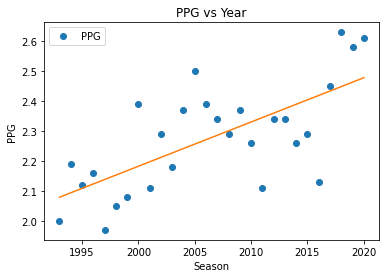

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
Season = [1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
df = pd.DataFrame({'Season':Season,'PPG':PPG})
df=df.astype(float)
result = sm.ols('PPG ~ Season',df).fit()
yint = result.params[0]
slope = result.params[1]

yfit = yint + slope * df['Season']
x = df['Season']
df.plot('Season','PPG',style='o')
plt.ylabel('PPG')
plt.title('PPG vs Year')
plt.plot(x,yfit)
plt.show()